In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import scipy.optimize

In [2]:
def ll4(x, h, r_min, r_max, ec50):
    '''This function is basically a copy of the LL.4 function from the R drc package with
     - x: concentration
     - h: hill slope
     - r_min: min response
     - r_max: max response
     - ec50: EC50'''
    return (r_min + (r_max - r_min) / (1 + np.exp(h * (np.log(x)-np.log(ec50)))))

In [3]:
base_path = Path("/home/galtay/data/hack4nf-2022/synapse/syn5522627")

In [4]:
df_meta_1 = pd.read_csv(base_path / "SYNAPSE_METADATA_MANIFEST.tsv", sep="\t")

In [5]:
df_meta_1.head(2)

,path,parent,name,id,synapseStore,contentType,used,executed,activityName,activityDescription,...,individualMetadataSynId,studyName,isMultiSpecimen,eTag,species,reporterSubstance,dataType,drugScreenType,nf1Genotype,cellType
0,/home/galtay/data/hack4nf-2022/synapse/syn5522...,syn5522627,NTAP ipNF02.3 2l MIPE qHTS.csv,syn5522642,True,text/csv,NaN,NaN,NaN,NaN,...,syn7805075,Drug Screening of pNF Cell Lines,NaN,NaN,Homo sapiens,NaN,drugScreen,smallMoleculeLibraryScreen,+/+,cultured cell
1,/home/galtay/data/hack4nf-2022/synapse/syn5522...,syn5522627,NTAP ipNF05.5 MC MIPE qHTS.csv,syn5522644,True,text/csv,NaN,NaN,NaN,NaN,...,syn7805075,Drug Screening of pNF Cell Lines,NaN,NaN,Homo sapiens,NaN,drugScreen,smallMoleculeLibraryScreen,-/-,cultured cell


In [6]:
df1 = pd.read_csv(base_path / "NTAP ipNF02.3 2l MIPE qHTS.csv")

In [7]:
c_cols = [f"C{i}" for i in range(11)]
r_cols = [f"DATA{i}" for i in range(11)]

In [8]:
df1

,NCGC protocol,NCGC SID,Cell line,CRC,LAC50,HILL,INF,ZERO,MAXR,FAUC,...,C4,C5,C6,C7,C8,C9,C10,name,target,smi
0,s-ntap-1PNO-1,NCGC00013226-15,ipNF02.3 2l,4.0,-4.429209,4.954917,92.599268,102.607590,94.933988,491.103545,...,0.063214,0.189642,0.568925,1.706776,5.120328,15.360983,46.082949,Stelazine\ntrifluoperzine,DRD2,CN1CCN(CCCN2C3=C(SC4=C2C=C(C=C4)C(F)(F)F)C=CC=...
1,s-ntap-1PNO-1,NCGC00013724-01,ipNF02.3 2l,4.0,-6.529209,2.406378,110.407771,104.056477,106.976836,514.309666,...,0.063214,0.189642,0.568925,1.706776,5.120328,15.360983,46.082949,Methscopolamine bromide,NaN,[Br-].OC[C@H](c1ccccc1)C(=O)O[C@@H]2C[C@@H]3[C...
2,s-ntap-1PNO-1,NCGC00013822-03,ipNF02.3 2l,4.0,-4.429209,0.300000,85.882725,107.067320,91.413491,493.120192,...,0.063214,0.189642,0.568925,1.706776,5.120328,15.360983,46.082949,NSC-75503,SHH,S1C(=C(C2=CC=NC=C2)C(=C1C3=CC=NC=C3)C4=CC=NC=C...
3,s-ntap-1PNO-1,NCGC00013841-08,ipNF02.3 2l,-2.4,-4.829209,2.303117,86.834654,108.936620,88.518315,511.568253,...,0.063214,0.189642,0.568925,1.706776,5.120328,15.360983,46.082949,Cyclobenzaprine hydrochloride,HTR2A,CN(C)CCC=C1C2=C(C=CC=C2)\C=C/C3=C1C=CC=C3
4,s-ntap-1PNO-1,NCGC00014352-03,ipNF02.3 2l,-2.2,-4.729209,2.333173,61.415442,107.148439,62.328161,494.262449,...,0.063214,0.189642,0.568925,1.706776,5.120328,15.360983,46.082949,GANT61,SHH,CN(C)C1=C(CN2CCCN(CC3=C(C=CC=C3)N(C)C)C2C4=CC=...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1907,s-ntap-1PNO-1,NCGC00347955-01,ipNF02.3 2l,4.0,-5.579209,0.500000,90.329830,106.293892,92.823840,487.836267,...,0.063214,0.189642,0.568925,1.706776,5.120328,15.360983,46.082949,SR1664,PPARG,C[C@H](NC(=O)C1=CC2=C(C=C1)[N](CC3=CC=C(C=C3)C...
1908,s-ntap-1PNO-1,NCGC00347956-01,ipNF02.3 2l,-3.0,-4.429209,4.954917,63.003984,106.867494,74.228471,504.493759,...,0.063214,0.189642,0.568925,1.706776,5.120328,15.360983,46.082949,SR9011,NR1D1,CCCCCNC(=O)N1CCC(CN(CC2=CC=C(S2)[N+]([O-])=O)C...
1909,s-ntap-1PNO-1,NCGC00347957-01,ipNF02.3 2l,4.0,-8.629209,1.538589,113.232532,101.732532,111.847438,538.119110,...,0.063214,0.189642,0.568925,1.706776,5.120328,15.360983,46.082949,UNC669,NaN,BrC1=CN=CC(=C1)C(=O)N2CCC(CC2)N3CCCC3
1910,s-ntap-1PNO-1,NCGC00347958-01,ipNF02.3 2l,-1.1,-6.279209,3.929473,1.986828,103.948175,1.013438,297.293948,...,0.063214,0.189642,0.568925,1.706776,5.120328,15.360983,46.082949,WS3,NaN,CN1CCN(CC1)CC2=CC=C(NC(=O)NC3=CC=C(OC4=CC(=NC=...


In [9]:
show_cols = [c for c in df1.columns if c not in c_cols + r_cols]

In [10]:
iloc = 3
df1.iloc[iloc][show_cols]

NCGC protocol                                s-ntap-1PNO-1
NCGC SID                                   NCGC00013841-08
Cell line                                      ipNF02.3 2l
CRC                                                   -2.4
LAC50                                            -4.829209
HILL                                              2.303117
INF                                              86.834654
ZERO                                             108.93662
MAXR                                             88.518315
FAUC                                            511.568253
TAUC                                            511.618732
R2                                                0.882703
PHILL                                             0.006038
NPT                                                     11
name                         Cyclobenzaprine hydrochloride
target                                               HTR2A
smi              CN(C)CCC=C1C2=C(C=CC=C2)\C=C/C3=C1C=CC=

In [11]:
2**-4.83

0.035158077646525294

In [12]:
cs = df1.iloc[iloc][c_cols].astype(float).values
rs = df1.iloc[iloc][r_cols].astype(float).values

In [13]:
fit_coefs, cov_matrix = scipy.optimize.curve_fit(ll4, cs, rs)
h, r_min, r_max, ec50 = fit_coefs

In [14]:
print(f"h={h:.2f}, r_min={r_min:.2f}, r_max={r_max:.2f}, ec50={ec50:.2f}")

h=2.51, r_min=87.51, r_max=108.85, ec50=14.02


In [15]:
rs_fit_me = ll4(cs, *fit_coefs)
rs_fit_them = ll4(
    cs, 
    df1.iloc[iloc]["HILL"],
    df1.iloc[iloc]["INF"],
    df1.iloc[iloc]["ZERO"],
    #np.exp(1.)**df1.iloc[iloc]["LAC50"],
    2**df1.iloc[iloc]["LAC50"],
)

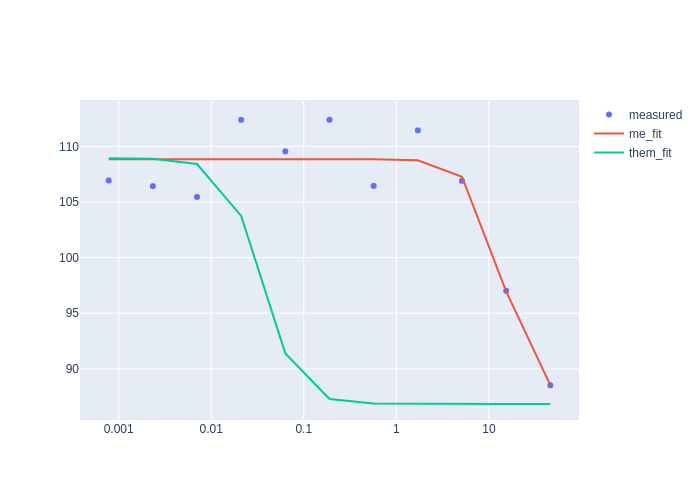

In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=cs, y=rs, mode='markers', name='measured'))
fig.add_trace(go.Scatter(x=cs, y=rs_fit_me, mode='lines', name='me_fit'))
fig.add_trace(go.Scatter(x=cs, y=rs_fit_them, mode='lines', name='them_fit'))
fig.update_xaxes(type="log")
fig.show(renderer="png")

In [17]:
ss_tot = np.sum((rs - rs.mean())**2)
ss_tot

511.8943239385419

In [18]:
ss_res = np.sum((rs - rs_fit_me)**2)
ss_res

59.81971698877076

In [19]:
r2 = 1 - ss_res / ss_tot
r2

0.8831404956231694

In [20]:
cov_matrix

array([[  4.4996699 ,   6.65241712,  -0.7021875 ,  -3.07990879],
       [  6.65241712,  21.89334258,  -0.85640852, -13.35583584],
       [ -0.7021875 ,  -0.85640852,   1.10997338,  -0.34719483],
       [ -3.07990879, -13.35583584,  -0.34719483,  17.66781821]])